# Project 2

## Inport Data

Load data set using $wdbc.data$. Drop '*ID number*' column which is column $0$. Grab columns $2$ to $32$ as test data. Put column $1$ as target. The target is string $M$ and $B$. In order to make predict result more accurate, covert all $M$s as $1$ and all $B$s as $0$.

In [0]:
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = np.loadtxt(url, delimiter=",", dtype=np.str)

# divide data into X and y
X = data[:, 2:32].astype(float)
y = data[:, 1]
# scale all X
for i in range(X.shape[1]):
  X[:, i] = X[:, i] / max(X[:, i])
for i in range(y.shape[0]):
  if y[i] == 'M':
    y[i] = 1
  else :
    y[i] = 0
y = y.astype(int)

## MLP

Build the Multi-layer Perceptron (MLP) mode.

### Number of Hidden Layers

Build MLP using parameters used in last project and change the number of hidden numbers.

Mean: 0.9611279608495321
Standard Deviation: 0.003982142057892286
Maxima Difference: 0.024624855713736182


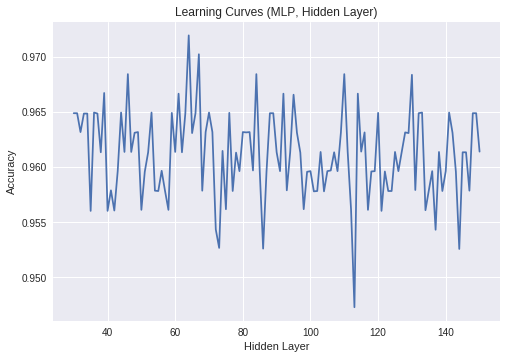

In [22]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

def plot_learning_curve_hidden_layer(X, y, cv=None, min_layer=0, 
                                     max_layer=0, scoring='accuracy'):
  scores_list = list(range(min_layer, max_layer + 1))
  
  for i in scores_list:
    mlp = MLPClassifier(solver='lbfgs',
                        activation='logistic',
                        hidden_layer_sizes=(i),
                        learning_rate_init=1e-5,
                        max_iter=1e+3)
    scores = cross_validate(mlp, X, y, cv=cv, scoring=scoring)
    scores_list[i - min_layer] = scores['test_score'].mean()
  
  print("Mean:", np.mean(scores_list))
  print("Standard Deviation:", np.std(scores_list))
  print("Maxima Difference:", max(scores_list) - min(scores_list))
  
  plt.xlabel('Hidden Layer')
  plt.ylabel('Accuracy')
  plt.title('Learning Curves (MLP, Hidden Layer)')
  
  plt.plot(list(range(min_layer, max_layer + 1)), scores_list)
  return plt

plt_hl = plot_learning_curve_hidden_layer(X, y, cv=5, min_layer=30, 
                                          max_layer=150, scoring='accuracy')
plt_hl.show()

According to the plot above, we can say that the difference between differen numbers of hidden layers is very small, and the accuracy is always above $95\%$. Thus, we can directly use $30$ as our hidden layers in order to get the smallest runtime.

### Parameters

Now, plot other parameters inlcuding solver, activation function, and etc. And we need to prepare learning curve function first.


In [0]:
from sklearn.model_selection import learning_curve

################
#
# Code retrive from 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
#
################
def plot_learning_curve_cv(estimator, title, X, y, ylim=None, cv=None,
                           n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### Solver

Try to run three different solvers, but '*sgd*' and '*adam*' cannot deal with float. Thus, we can only choose '*lbfgs*' as our solver.

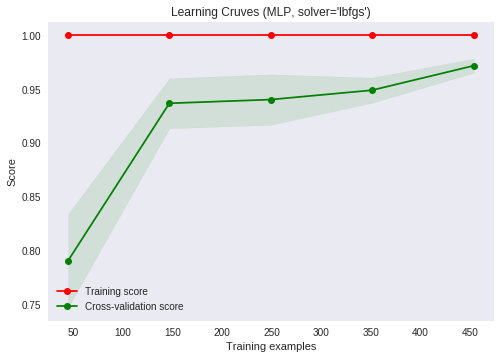

In [23]:
mlp = MLPClassifier(solver='lbfgs',
                    activation='logistic',
                    hidden_layer_sizes=(30),
                    learning_rate_init=1e-5,
                    max_iter=1e+3,
                    verbose=False)
plot_learning_curve_cv(mlp, "Learning Cruves (MLP, solver='lbfgs')", 
                       X, y, cv = 5)

# mlp = MLPClassifier(solver='sgd',
#                     activation='logistic',
#                     hidden_layer_sizes=(30),
#                     learning_rate_init=1e-5,
#                     max_iter=1e+3,
#                     verbose=False)
# plot_learning_curve_cv(mlp, "Learning Cruves (MLP, solver='sdg')", 
#                        X, y, cv = 5)

# mlp = MLPClassifier(solver='adam',
#                     activation='logistic',
#                     hidden_layer_sizes=(30),
#                     learning_rate_init=1e-5,
#                     max_iter=1e+3,
#                     verbose=False)
# plot_learning_curve_cv(mlp, "Learning Cruves (MLP, solver='adam')", 
#                        X, y, cv = 5)

plt.show()

Using '*lbfgs*' as solver can get a accuracy above $95\%$. Thus, this solver can be used in actrue function.

#### Activation function

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

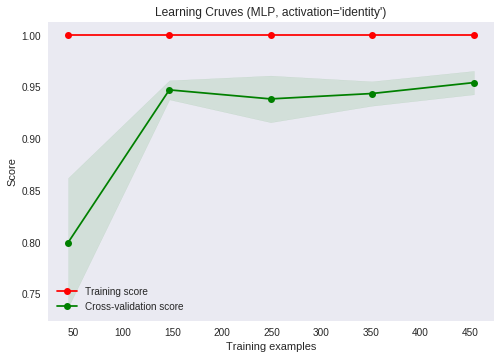

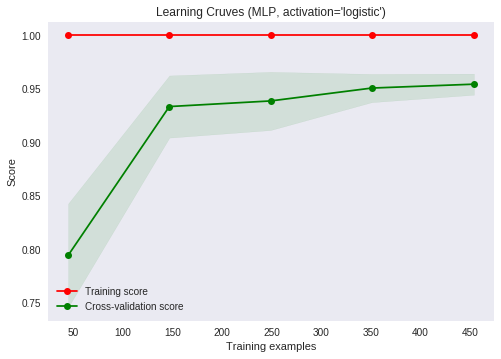

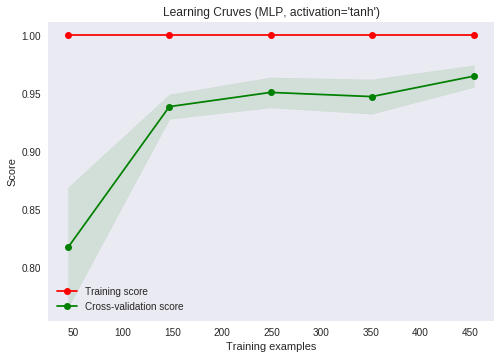

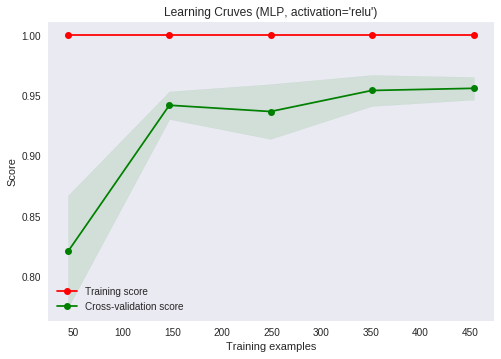

In [26]:
mlp = MLPClassifier(solver='lbfgs',
                    activation='identity',
                    hidden_layer_sizes=(30),
                    learning_rate_init=1e-5,
                    max_iter=1e+3)
plot_learning_curve_cv(mlp, "Learning Cruves (MLP, activation='identity')", 
                       X, y, cv = 5)

mlp = MLPClassifier(solver='lbfgs',
                    activation='logistic',
                    hidden_layer_sizes=(30),
                    learning_rate_init=1e-5,
                    max_iter=1e+3)
plot_learning_curve_cv(mlp, "Learning Cruves (MLP, activation='logistic')", 
                       X, y, cv = 5)

mlp = MLPClassifier(solver='lbfgs',
                    activation='tanh',
                    hidden_layer_sizes=(30),
                    learning_rate_init=1e-5,
                    max_iter=1e+3)
plot_learning_curve_cv(mlp, "Learning Cruves (MLP, activation='tanh')", 
                       X, y, cv = 5)

mlp = MLPClassifier(solver='lbfgs',
                    activation='relu',
                    hidden_layer_sizes=(30),
                    learning_rate_init=1e-5,
                    max_iter=1e+3)
plot_learning_curve_cv(mlp, "Learning Cruves (MLP, activation='relu')", 
                       X, y, cv = 5)

According to the result above, four activation function returns similar accuracy, then I decide to chose '*logistic*' as activation function.

## SVM

Build the Support Vector Machine (SVM) mode.

Choose '*auto*' as parameter for $gama$.

In [0]:
from sklearn.svm import SVC

clf = SVC(gamma = 'auto')

## Differences

Build MLP mode and scoring both using 5-folds cross validation.

In [0]:
mlp = MLPClassifier(solver='lbfgs',
                    activation='logistic',
                    hidden_layer_sizes=(30),
                    learning_rate_init=1e-5,
                    max_iter=1e+3)

clf_scores = cross_validate(clf, X, y, cv=5, scoring='accuracy')
mlp_scores = cross_validate(mlp, X, y, cv=5, scoring='accuracy')

Build result matrix to show difference between two model.

In [101]:
import pandas as pd

columns = mlp_scores.keys()
index = ['MLP', 'SVM']
result_mtx = pd.DataFrame([[np.mean(score) for score in mlp_scores.values()],
                           [np.mean(score) for score in clf_scores.values()]],
                          columns = columns, index = index)
print(result_mtx)

     fit_time  score_time  test_score  train_score
MLP  0.176215    0.000555    0.961431     1.000000
SVM  0.006776    0.001582    0.940377     0.943767


According to the matrix above, MLP have a lot more running time than SVM when training the data set, which is about $30$ times. But for predict time, MLP only takes $\frac{1}{3}$ times of SVM. However, comapre to traning time, predict time can be ignored. Comes to scores, test score only has small difeerence. MLP is a little bit higher than SVM like $2\%$. And for training score, the difference is about $5\%$. In conclusion, although MLP has higher accracy than SVM, the difference is so mall that we can ignore. And because of the speed of SVM is a lot faster than MLP, SVM suited better than MLP in this data set.